Data for imputation: https://docs.google.com/spreadsheets/d/16qssg0u3nqzUdU2WNURnoj861L3_3PKl/edit?usp=drive_link&ouid=115111747126699895690&rtpof=true&sd=true

Data used in this study: https://docs.google.com/spreadsheets/d/1RAwiTQ9KreSPGOkh1iGbfNRV08QWyMv6/edit?usp=drive_link&ouid=115111747126699895690&rtpof=true&sd=true

Data imputed: https://docs.google.com/spreadsheets/d/1irmMatoXiKgTZFvbxCkWI6B6IO3Tqjzd/edit?usp=drive_link&ouid=115111747126699895690&rtpof=true&sd=true

# Data imputation

In [ ]:
!pip install matplotlib #to install matplotlib
!pip install mpl_toolkits #to install mpl_toolkits
!pip install psutil #to install psutil
!pip install scikit-learn #to install scikit-learn
!pip install shap #to install SHapley Additive exPlanations

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [ ]:
!pip install --pre pycaret # to install pycaret

In [ ]:
#to import all Pycaret regression functions
from pycaret.regression import *

In [ ]:
import pandas as pd    #to import pandas as pd
import numpy as np    #to import numpy as np
import random
import xgboost
import shap
from google.colab import files
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error  #to import MSE
from sklearn.metrics import mean_absolute_error #to import MAE
from sklearn.metrics import mean_absolute_percentage_error #to import MAPE
from sklearn.metrics import r2_score #to import coefficient of determination
import matplotlib.pyplot as plt  #to import matplotlib as plt
import seaborn as sns #to import seaborn as sns
import math #to import math
import gc

In [ ]:
#to access the data file from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#to open the data file from google drive
df_imputer = pd.read_excel(r'/content/drive/My Drive/Colab Notebooks/ML Conference/Data for Imputation.xlsx')
df = pd.read_excel(r'/content/drive/My Drive/Colab Notebooks/ML Conference/CNC reinforced PVA composites.xlsx') #to save the data file as df
df_imputer.head() #returns the first 5 rows of the data
df.head() #returns the first 5 rows of the data

,Hydrolysis degree (%),Molecular weight (Da),PVA percentage in water (%),PVA Temperature (°C),PVA time (min),Mix Temperature (°C),Mix time (min),Sonication time (min),Diameter/Width (nm),CNC (%),Tensile strength (MPa)
0,98.5,72000,5,90,60,0.0,0,30,0,0.0,18.137
1,98.5,72000,5,90,60,0.0,0,30,NAN,5.0,23.627
2,98.5,72000,5,90,60,0.0,0,30,NAN,10.0,28.627
3,98.5,72000,5,90,60,0.0,0,30,NAN,15.0,33.921
4,98.5,72000,5,90,60,0.0,0,30,NAN,20.0,38.921


In [ ]:
df_missingvalues = df_imputer.copy() #to copy the data file as df_missingvalues
ds_hd = df_missingvalues['Hydrolysis degree (%)'].shape #returns the shape of the data

missing_mask_hd = random.sample(range(0, ds_hd[0]), 10)
df_valueshd_real = df_imputer['Hydrolysis degree (%)'][missing_mask_hd].tolist()
df_missingvalues['Hydrolysis degree (%)'][missing_mask_hd] = np.nan
missing_mask_mw = random.sample(range(0, ds_hd[0]), 10)
df_valuesmw_real = df_imputer['Molecular weight (Da)'][missing_mask_mw].tolist()
df_missingvalues['Molecular weight (Da)'][missing_mask_mw] = np.nan
missing_mask_pvaper = random.sample(range(0, ds_hd[0]), 10)
df_valuespvaper_real = df_imputer['PVA percentage in water (%)'][missing_mask_pvaper].tolist()
df_missingvalues['PVA percentage in water (%)'][missing_mask_pvaper] = np.nan
missing_mask_pvaTemp = random.sample(range(0, ds_hd[0]), 10)
df_valuespvaTemp_real = df_imputer['PVA Temperature (°C)'][missing_mask_pvaTemp].tolist()
df_missingvalues['PVA Temperature (°C)'][missing_mask_pvaTemp] = np.nan
missing_mask_pvatime = random.sample(range(0, ds_hd[0]), 10)
df_valuespvatime_real = df_imputer['PVA time (min)'][missing_mask_pvatime].tolist()
df_missingvalues['PVA time (min)'][missing_mask_pvatime] = np.nan
missing_mask_diameter = random.sample(range(0, ds_hd[0]), 10)
df_valuesdiameter_real = df_imputer['Diameter/Width (nm)'][missing_mask_diameter].tolist()
df_missingvalues['Diameter/Width (nm)'][missing_mask_diameter] = np.nan

df_valueshd_imputed = []
df_valuesmw_imputed = []
df_valuespvaper_imputed = []
df_valuespvaTemp_imputed = []
df_valuespvatime_imputed = []
df_valuesdiameter_imputed = []


max_depth = list(range(6, 27)) + [None]
param_grid = ParameterGrid({"n_estimators": list(range(20, 117)),
     "max_depth": max_depth})

results = []
best_score = 0
original_score = 0
z=0
for param in param_grid:
  z=z+1
  print(f"Iteration {z}")
  imputer = IterativeImputer(estimator=ExtraTreesRegressor(**param))
  fit = imputer.fit(df_missingvalues)
  df_hd_imputed = fit.transform(df_missingvalues)
  for i in missing_mask_hd:
    df_valueshd_imputed.append(df_hd_imputed[i][0])
  for j in missing_mask_mw:
    df_valuesmw_imputed.append(df_hd_imputed[j][1])
  for k in missing_mask_pvaper:
    df_valuespvaper_imputed.append(df_hd_imputed[k][2])
  for l in missing_mask_pvaTemp:
    df_valuespvaTemp_imputed.append(df_hd_imputed[l][3])
  for m in missing_mask_pvatime:
    df_valuespvatime_imputed.append(df_hd_imputed[m][4])
  for n in missing_mask_diameter:
    df_valuesdiameter_imputed.append(df_hd_imputed[n][8])
  errorhd = r2_score(df_valueshd_real, df_valueshd_imputed)
  errormw = r2_score(df_valuesmw_real, df_valuesmw_imputed)
  errorpvaper = r2_score(df_valuespvaper_real, df_valuespvaper_imputed)
  errorpvaTemp = r2_score(df_valuespvaTemp_real, df_valuespvaTemp_imputed)
  errorpvatime = r2_score(df_valuespvatime_real, df_valuespvatime_imputed)
  errordiameter = r2_score(df_valuesdiameter_real, df_valuesdiameter_imputed)
  score = (errorhd + errormw + errorpvaper + errorpvaTemp + errorpvatime + errordiameter)/6
  param["score"]= score
  results.append(param)
  df_valueshd_imputed.clear()
  df_valuesmw_imputed.clear()
  df_valuespvaper_imputed.clear()
  df_valuespvaTemp_imputed.clear()
  df_valuespvatime_imputed.clear()
  df_valuesdiameter_imputed.clear()
  if param['max_depth'] == None and param['n_estimators']==100:
    original_score = score
  if score > best_score:
    best_score = score
    best_param = param


print(f"  Original values for hyperparameters:")
print(f"  max_depth: None")
print(f"  n_estimators: 100")
print(f"  Original score: {original_score}")
print("-" * 50)
print(f"  Optimal values for hyperparameters:")
print(f"  max_depth: {best_param['max_depth']}")
print(f"  n_estimators: {best_param['n_estimators']}")
print(f"  Optimal score: {best_score}")

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration 77
Iteratio

In [ ]:
md = best_param['max_depth']
ne = best_param['n_estimators']
optimized_imputer = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators = ne, max_depth = md))
op_fit = optimized_imputer.fit(df)
opimputed_df = pd.DataFrame(op_fit.transform(df), columns=df.columns)
pd.options.display.max_rows = None  # To show all rows
pd.options.display.max_columns = None # To show all columns
print(opimputed_df)
opimputed_df.to_excel("dataframe_imputed.xlsx", index=False)
files.download("dataframe_imputed.xlsx")

     Hydrolysis degree (%)  Molecular weight (Da)  \
0                98.500000           72000.000000   
1                98.500000           72000.000000   
2                98.500000           72000.000000   
3                98.500000           72000.000000   
4                98.500000           72000.000000   
5                98.000000          145000.000000   
6                98.000000          145000.000000   
7                98.000000          145000.000000   
8                98.000000          145000.000000   
9                98.000000          145000.000000   
10               98.000000          145000.000000   
11               98.000000          145000.000000   
12               98.000000          145000.000000   
13               89.000000          155000.000000   
14               89.000000          155000.000000   
15               89.000000          155000.000000   
16               89.000000          155000.000000   
17               89.000000          155000.000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
round(opimputed_df.describe(),2) # describe() returns the description of the data in the DataFrame (mean, standard deviation, and percentiles)
# A data frame is a data structure that organizes data into a 2-dimensional table of rows and columns
#round(): returns a value with a specific number of decimals

,Hydrolysis degree (%),Molecular weight (Da),PVA percentage in water (%),PVA Temperature (°C),PVA time (min),Mix Temperature (°C),Mix time (min),Sonication time (min),Diameter/Width (nm),CNC (%),Tensile strength (MPa)
count,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00
mean,96.59,95602.80,6.72,58.26,75.15,50.35,97.20,22.93,20.64,3.79,58.49
std,3.57,40675.69,3.32,39.47,83.75,37.70,116.98,46.90,22.57,4.20,31.15
min,88.00,30000.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.95
25%,96.85,57988.37,3.00,0.00,0.00,0.00,0.00,0.00,5.90,1.00,33.83
50%,98.00,95372.09,7.50,80.00,60.00,77.50,60.00,10.00,7.97,3.00,54.20
75%,98.75,136000.00,10.00,90.00,105.70,80.00,180.00,10.00,30.00,5.00,75.99
max,100.00,155000.00,10.00,95.00,360.00,95.00,480.00,180.00,100.00,20.00,143.57


In [ ]:
round(opimputed_df.corr( ),2)  #to calculate the correlation coefficient of the variables and round the values to two decimal places

,Hydrolysis degree (%),Molecular weight (Da),PVA percentage in water (%),PVA Temperature (°C),PVA time (min),Mix Temperature (°C),Mix time (min),Sonication time (min),Diameter/Width (nm),CNC (%),Tensile strength (MPa)
Hydrolysis degree (%),1.00,-0.28,0.26,0.09,-0.04,-0.16,-0.60,-0.23,0.12,0.05,-0.66
Molecular weight (Da),-0.28,1.00,-0.37,-0.13,-0.12,-0.00,0.20,-0.11,-0.02,0.06,0.38
PVA percentage in water (%),0.26,-0.37,1.00,-0.24,-0.01,0.37,-0.13,-0.29,0.28,0.12,-0.25
PVA Temperature (°C),0.09,-0.13,-0.24,1.00,0.56,-0.65,-0.28,-0.31,-0.04,-0.04,-0.03
PVA time (min),-0.04,-0.12,-0.01,0.56,1.00,-0.23,0.12,-0.22,-0.03,-0.10,0.04
Mix Temperature (°C),-0.16,-0.00,0.37,-0.65,-0.23,1.00,0.29,0.28,0.33,0.10,0.07
Mix time (min),-0.60,0.20,-0.13,-0.28,0.12,0.29,1.00,0.17,0.03,-0.06,0.29
Sonication time (min),-0.23,-0.11,-0.29,-0.31,-0.22,0.28,0.17,1.00,0.14,-0.23,0.04
Diameter/Width (nm),0.12,-0.02,0.28,-0.04,-0.03,0.33,0.03,0.14,1.00,0.15,-0.20
CNC (%),0.05,0.06,0.12,-0.04,-0.10,0.10,-0.06,-0.23,0.15,1.00,0.17


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

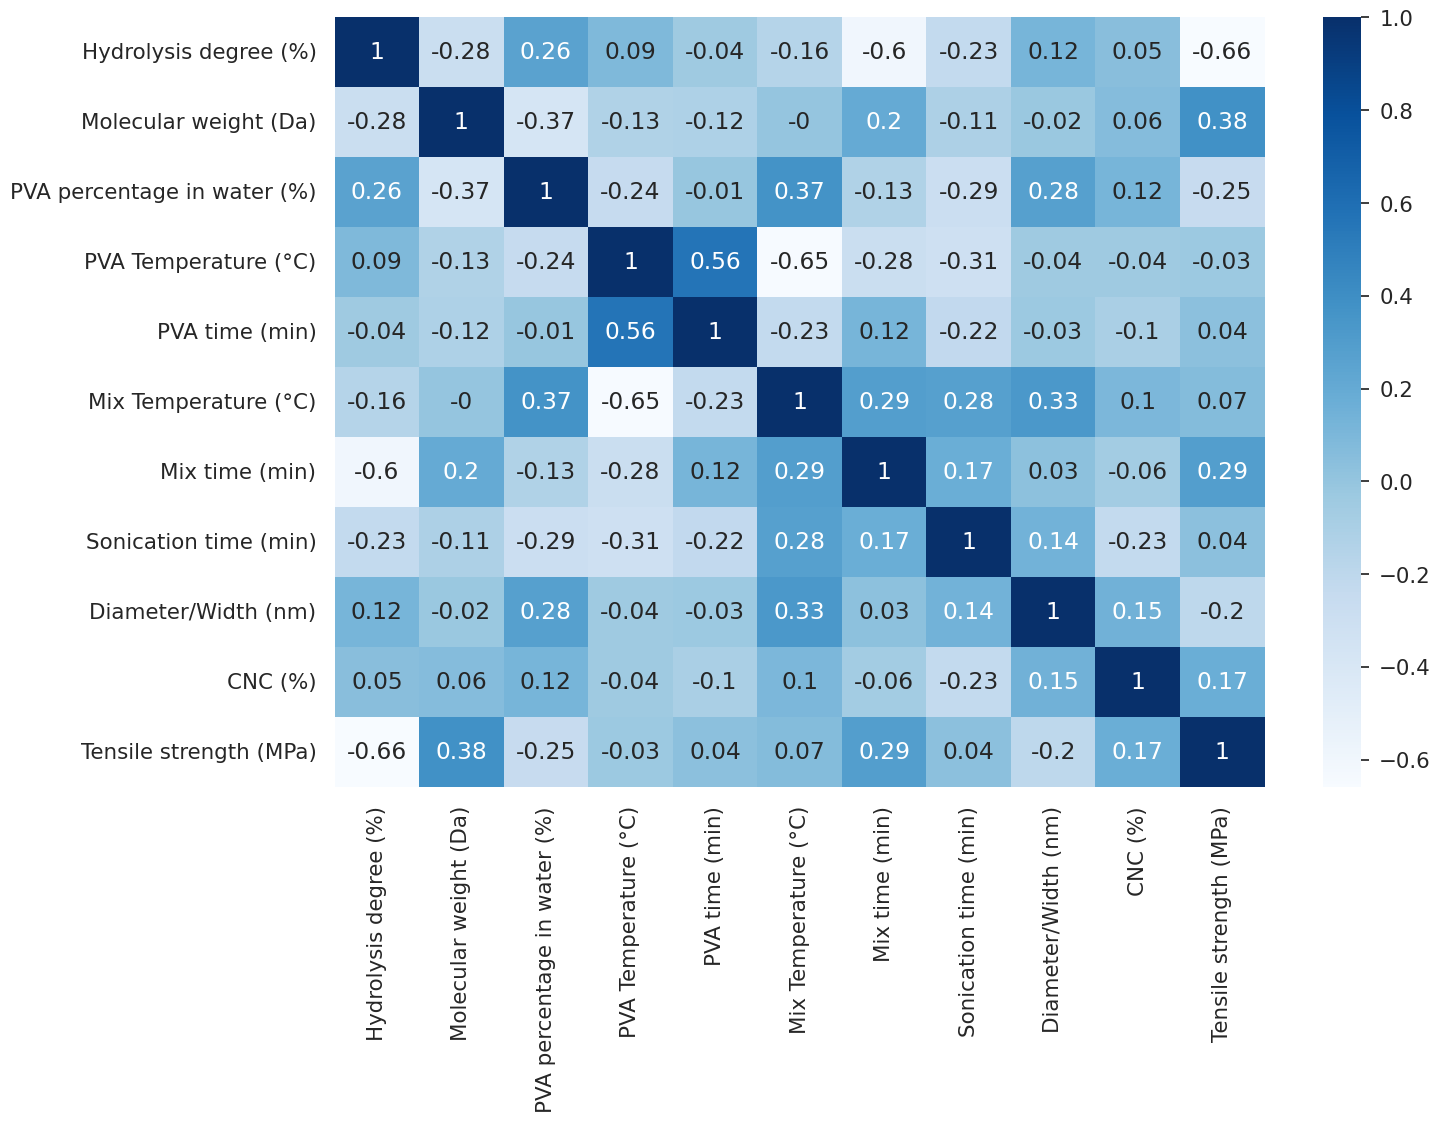

In [ ]:
df_corr =  round(opimputed_df.corr( ),2) #to save the correlation coefficients as df_corr
plt.figure(figsize=(15,10)) #plt.figure() to graph the table
#figsize: width, height in inches of the figure
sns.set(font_scale=1.4) #font size
heat_map = sns.heatmap(df_corr,annot=True,cmap=plt.cm.Blues) #to create the heatmap
#annot=True: to write the data value in each cell'
#cmap=plt.cm.Blues: the color of the heatmap
#to save the image
plt.savefig("heat_map.png", dpi=1200, format='png', bbox_inches='tight')
files.download("heat_map.png")

# Machine learning regression models

In [ ]:
#setup(): to initialize the environment
#opimputed_df is the dataset
#target is the tensile strength
#normalize = True: to normalize the data
#normalize_method = 'zscore': the method to normalize the data
#numeric_features: the input variables
#fold=3: for k-fold cross validation
reg = setup(opimputed_df, target = 'Tensile strength (MPa)',
            session_id = 42,
             fold=3,
            train_size=0.9,
            numeric_features = ['Hydrolysis degree (%)', 'Molecular weight (Da)',
                                'PVA percentage in water (%)', 'PVA Temperature (°C)',
                                'PVA time (min)', 'Mix Temperature (°C)',
                                'Mix time (min)', 'Sonication time (min)',
                                'Diameter/Width (nm)', 'CNC (%)'],
            use_gpu = False)

,Description,Value
0,Session id,42
1,Target,Tensile strength (MPa)
2,Target type,Regression
3,Original data shape,"(107, 11)"
4,Transformed data shape,"(107, 11)"
5,Transformed train set shape,"(96, 11)"
6,Transformed test set shape,"(11, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models() #to compare all regression models

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,10.7076,242.6048,15.3524,0.7416,0.2795,0.2445,0.2133
xgboost,Extreme Gradient Boosting,11.7376,291.1206,16.7865,0.6927,0.3072,0.2570,0.1133
gbr,Gradient Boosting Regressor,12.1446,330.7353,17.5470,0.6725,0.3189,0.2621,0.0733
rf,Random Forest Regressor,12.2755,311.9202,17.2668,0.6721,0.3091,0.2722,0.2900
ada,AdaBoost Regressor,14.7103,486.1599,21.1161,0.5279,0.3698,0.3232,0.1433
dt,Decision Tree Regressor,13.9809,413.2004,20.1360,0.5227,0.3959,0.3291,0.0500
knn,K Neighbors Regressor,17.9162,578.2072,23.4035,0.4139,0.4039,0.3723,0.0367
lightgbm,Light Gradient Boosting Machine,16.7090,531.0367,22.7134,0.4072,0.4116,0.4377,0.0600
en,Elastic Net,19.3879,667.6308,25.5740,0.2739,0.4635,0.4532,0.0267
llar,Lasso Least Angle Regression,19.4409,671.7658,25.6538,0.2656,0.4647,0.4536,0.0300


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
et_train = create_model('et') #to create a extra trees regression model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.9590,148.6460,12.1920,0.7689,0.3707,0.3516
1,11.3418,346.9560,18.6268,0.7590,0.2036,0.1411
2,11.8220,232.2124,15.2385,0.6969,0.2642,0.2407
Mean,10.7076,242.6048,15.3524,0.7416,0.2795,0.2445
Std,1.2519,81.2925,2.6282,0.0319,0.0691,0.0859


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
et_test = predict_model(et_train) #to tune the extra trees regression model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,6.3030,111.3370,10.5516,0.7753,0.1197,0.1041


In [ ]:
xgboost_train = create_model('xgboost') #to create a XGBoost regression model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.8322,176.1424,13.2719,0.7262,0.3903,0.3721
1,13.3964,429.3090,20.7198,0.7017,0.2630,0.1854
2,11.9843,267.9105,16.3680,0.6503,0.2683,0.2133
Mean,11.7376,291.1206,16.7865,0.6927,0.3072,0.2570
Std,1.4655,104.6498,3.0550,0.0316,0.0588,0.0822


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
xgboost_predict = predict_model(xgboost_train) #to predict the model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,7.1091,117.1470,10.8234,0.7635,0.1386,0.1270


In [ ]:
gbr_train = create_model('gbr') #to create a decision tree regression model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.4202,159.8446,12.6430,0.7515,0.3907,0.3700
1,14.8039,577.2614,24.0263,0.5990,0.2929,0.1807
2,12.2096,255.0998,15.9718,0.6670,0.2731,0.2354
Mean,12.1446,330.7353,17.5470,0.6725,0.3189,0.2621
Std,2.1984,178.6052,4.7788,0.0624,0.0514,0.0795


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
gbr_test = predict_model(gbr_train) #to tune the decision tree regression model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,7.3557,100.6347,10.0317,0.7969,0.1509,0.1409


In [ ]:
rf_train = create_model('rf') #to create a random forest regression model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.3202,151.5964,12.3124,0.7643,0.3865,0.3741
1,13.5316,451.3953,21.2461,0.6864,0.2332,0.1632
2,13.9747,332.7690,18.2420,0.5656,0.3077,0.2794
Mean,12.2755,311.9202,17.2668,0.6721,0.3091,0.2722
Std,2.0975,123.2771,3.7117,0.0818,0.0626,0.0863


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf_test = predict_model(rf_train) #to tune the random forest regression model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,5.5705,63.0072,7.9377,0.8728,0.1047,0.0989


In [ ]:
ada_train = create_model('ada') #to create an AdaBoost regression model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.9199,218.6190,14.7858,0.6602,0.4512,0.4930
1,17.4084,887.4590,29.7902,0.3835,0.3505,0.1995
2,14.8026,352.4016,18.7724,0.5400,0.3078,0.2770
Mean,14.7103,486.1599,21.1161,0.5279,0.3698,0.3232
Std,2.2416,288.9697,6.3458,0.1133,0.0601,0.1242


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
ada_test = predict_model(ada_train) #to tune the AdaBoost regression model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,7.1292,79.1668,8.8976,0.8402,0.1732,0.1525


In [ ]:
X = opimputed_df.drop('Tensile strength (MPa)', axis=1)
y = opimputed_df['Tensile strength (MPa)']  #Target

In [ ]:
mse_train_et_list = []
rmse_train_et_list = []
mae_train_et_list = []
mape_train_et_list = []
r2_train_et_list = []
mse_test_et_list = []
rmse_test_et_list = []
mae_test_et_list = []
mape_test_et_list = []
r2_test_et_list = []
for i in range(100):
  #Split the dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
  #Implement the ExtraTreesRegressor model
  model_et = ExtraTreesRegressor()
  # Train the ExtraTreesRegressor model
  model_et.fit(X_train, y_train)
  # Test the ExtraTreesRegressor model
  y_train_pred_et = model_et.predict(X_train)
  y_test_pred_et = model_et.predict(X_test)
  # Evaluate the train model
  mse_train_et = mean_squared_error(y_train, y_train_pred_et)
  rmse_train_et = np.sqrt(mse_train_et)
  mae_train_et = mean_absolute_error(y_train, y_train_pred_et)
  mape_train_et = mean_absolute_percentage_error(y_train, y_train_pred_et)
  r2_train_et = r2_score(y_train, y_train_pred_et)
  mse_train_et_list.append(mse_train_et)
  rmse_train_et_list.append(rmse_train_et)
  mae_train_et_list.append(mae_train_et)
  mape_train_et_list.append(mape_train_et)
  r2_train_et_list.append(r2_train_et)
  # Evaluate the test model
  mse_test_et = mean_squared_error(y_test, y_test_pred_et)
  rmse_test_et = np.sqrt(mse_test_et)
  mae_test_et = mean_absolute_error(y_test, y_test_pred_et)
  mape_test_et = mean_absolute_percentage_error(y_test, y_test_pred_et)
  r2_test_et = r2_score(y_test, y_test_pred_et)
  mse_test_et_list.append(mse_test_et)
  rmse_test_et_list.append(rmse_test_et)
  mae_test_et_list.append(mae_test_et)
  mape_test_et_list.append(mape_test_et)
  r2_test_et_list.append(r2_test_et)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_et_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_train_et_list)}, {np.std(mse_train_et_list)}')
print(f'RMSE: {rmse_train_et_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_train_et_list)}, {np.std(rmse_train_et_list)}')
print(f'MAE: {mae_train_et_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_train_et_list)}, {np.std(mae_train_et_list)}')
print(f'MAPE: {mape_train_et_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_train_et_list)}, {np.std(mape_train_et_list)}')
print(f'R2: {r2_train_et_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_train_et_list)}, {np.std(r2_train_et_list)}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_et_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_test_et_list)}, {np.std(mse_test_et_list)}')
print(f'RMSE: {rmse_test_et_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_test_et_list)}, {np.std(rmse_test_et_list)}')
print(f'MAE: {mae_test_et_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_test_et_list)}, {np.std(mae_test_et_list)}')
print(f'MAPE: {mape_test_et_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_test_et_list)}, {np.std(mape_test_et_list)}')
print(f'R2: {r2_test_et_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_test_et_list)}, {np.std(r2_test_et_list)}')

Train Metrics:
MSE: [8.338432331509112e-27, 8.835283224980813e-27, 7.358765694837768e-27, 8.432668340478639e-27, 8.643984455464718e-27, 8.262175777337748e-27, 7.481203481168946e-27, 8.548663762750512e-27, 8.77450806607441e-27, 8.947432950339733e-27, 7.864589881106358e-27, 8.026963750764349e-27, 8.343559927393048e-27, 9.003803635858652e-27, 8.364070310928795e-27, 8.560102245876216e-27, 8.606119132014109e-27, 8.391803702127971e-27, 8.747851141318817e-27, 8.83064866716264e-27, 7.906530985900608e-27, 8.539854815975544e-27, 8.560751412662804e-27, 8.895762561047757e-27, 8.748508525406502e-27, 8.642932640924422e-27, 8.398640496639886e-27, 8.576010940798173e-27, 8.507503301560386e-27, 8.655948845860569e-27, 8.832127781359929e-27, 8.73978996894359e-27, 8.174217786405605e-27, 8.00697927449875e-27, 7.741001672621732e-27, 8.638725382763243e-27, 8.541826968238597e-27, 9.069837867466526e-27, 8.278478902712315e-27, 8.570061614804631e-27, 8.539328908705396e-27, 8.63017938962335e-27, 8.644773316369939e

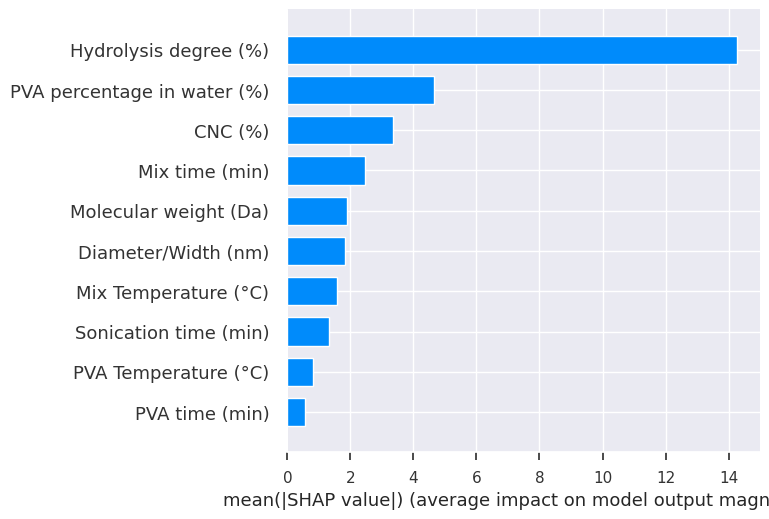

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x550 with 0 Axes>

In [ ]:
et_explainer = shap.TreeExplainer(model_et, X_train)
et_shap_values = et_explainer.shap_values(X_test)
shap.summary_plot(et_shap_values, X_test, plot_type="bar")

In [ ]:
# Search space
model = ExtraTreesRegressor()

param_distributions = {
    "n_estimators": list(range(10, 101)),
    "max_depth": list(range(5, 51)),
    "min_samples_split": list(range(2, 12)),
    "min_samples_leaf": list(range(1, 12)),
    "criterion": ["squared_error", "absolute_error", "poisson"],
    "max_features": list(range(1, 14))
}


random_search_et = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=2000,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)


random_search_et.fit(X_train, y_train)


best_pipeline_et = random_search_et.best_estimator_
print(best_pipeline_et)

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
ExtraTreesRegressor(criterion='absolute_error', max_depth=15, max_features=10,
                    min_samples_split=6, n_estimators=14)


In [ ]:
del X_train, X_test, y_train, y_test
gc.collect()

223

In [ ]:
mse_train_et_tune_list = []
rmse_train_et_tune_list = []
mae_train_et_tune_list = []
mape_train_et_tune_list = []
r2_train_et_tune_list = []
mse_test_et_tune_list = []
rmse_test_et_tune_list = []
mae_test_et_tune_list = []
mape_test_et_tune_list = []
r2_test_et_tune_list = []
for j in range(100):
  #Split the dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
  # Test the ExtraTreesRegressor model
  y_train_pred_et_tune = best_pipeline_et.predict(X_train)
  y_test_pred_et_tune = best_pipeline_et.predict(X_test)
  # Evaluate the train model
  mse_train_et_tune = mean_squared_error(y_train, y_train_pred_et_tune)
  rmse_train_et_tune = np.sqrt(mse_train_et_tune)
  mae_train_et_tune = mean_absolute_error(y_train, y_train_pred_et_tune)
  mape_train_et_tune = mean_absolute_percentage_error(y_train, y_train_pred_et_tune)
  r2_train_et_tune = r2_score(y_train, y_train_pred_et_tune)
  mse_train_et_tune_list.append(mse_train_et_tune)
  rmse_train_et_tune_list.append(rmse_train_et_tune)
  mae_train_et_tune_list.append(mae_train_et_tune)
  mape_train_et_tune_list.append(mape_train_et_tune)
  r2_train_et_tune_list.append(r2_train_et_tune)
  # Evaluate the test model
  mse_test_et_tune = mean_squared_error(y_test, y_test_pred_et_tune)
  mse_test_et_tune = mean_squared_error(y_test, y_test_pred_et_tune)
  rmse_test_et_tune = np.sqrt(mse_test_et_tune)
  mae_test_et_tune = mean_absolute_error(y_test, y_test_pred_et_tune)
  mape_test_et_tune = mean_absolute_percentage_error(y_test, y_test_pred_et_tune)
  r2_test_et_tune = r2_score(y_test, y_test_pred_et_tune)
  mse_test_et_tune_list.append(mse_test_et_tune)
  rmse_test_et_tune_list.append(rmse_test_et_tune)
  mae_test_et_tune_list.append(mae_test_et_tune)
  mape_test_et_tune_list.append(mape_test_et_tune)
  r2_test_et_tune_list.append(r2_test_et_tune)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_et_tune_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_train_et_tune_list)}, {np.std(mse_train_et_tune_list)}')
print(f'RMSE: {rmse_train_et_tune_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_train_et_tune_list)}, {np.std(rmse_train_et_tune_list)}')
print(f'MAE: {mae_train_et_tune_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_train_et_tune_list)}, {np.std(mae_train_et_tune_list)}')
print(f'MAPE: {mape_train_et_tune_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_train_et_tune_list)}, {np.std(mape_train_et_tune_list)}')
print(f'R2: {r2_train_et_tune_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_train_et_tune_list)}, {np.std(r2_train_et_tune_list)}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_et_tune_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_test_et_tune_list)}, {np.std(mse_test_et_tune_list)}')
print(f'RMSE: {rmse_test_et_tune_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_test_et_tune_list)}, {np.std(rmse_test_et_tune_list)}')
print(f'MAE: {mae_test_et_tune_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_test_et_tune_list)}, {np.std(mae_test_et_tune_list)}')
print(f'MAPE: {mape_test_et_tune_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_test_et_tune_list)}, {np.std(mape_test_et_tune_list)}')
print(f'R2: {r2_test_et_tune_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_test_et_tune_list)}, {np.std(r2_test_et_tune_list)}')

Train Metrics:
MSE: [67.86251195857018, 73.04139210421403, 68.6640015866585, 47.690364535874544, 63.96605463714715, 75.22267011042108, 76.83381934591364, 69.92710241524088, 75.83376515243098, 75.24006983147184, 63.13572018402465, 74.98917165308626, 49.91002370239088, 75.47087589548875, 70.75616632291172, 76.53269957581806, 75.67426316279874, 72.02032485514546, 75.25175349148708, 62.74983709728125, 57.09500057034162, 73.06494285639273, 73.23880453795392, 74.33420711944363, 70.42268289716723, 74.02250486130794, 76.9830335577454, 53.55080604691935, 68.01214753996551, 76.38625752401902, 75.09819789009745, 75.2403769066787, 70.77203427364375, 71.24606635639145, 68.70780672574891, 72.78063115063462, 72.93861371707247, 73.54912550590988, 73.88467440753062, 73.28408080545432, 72.55379380480566, 74.74753994405398, 77.54903304920478, 55.89268876708274, 75.43838091997908, 73.83512172368538, 74.11808726364119, 36.64278613080834, 74.56807763149529, 72.18789847798617, 65.2482840814684, 52.5650406281

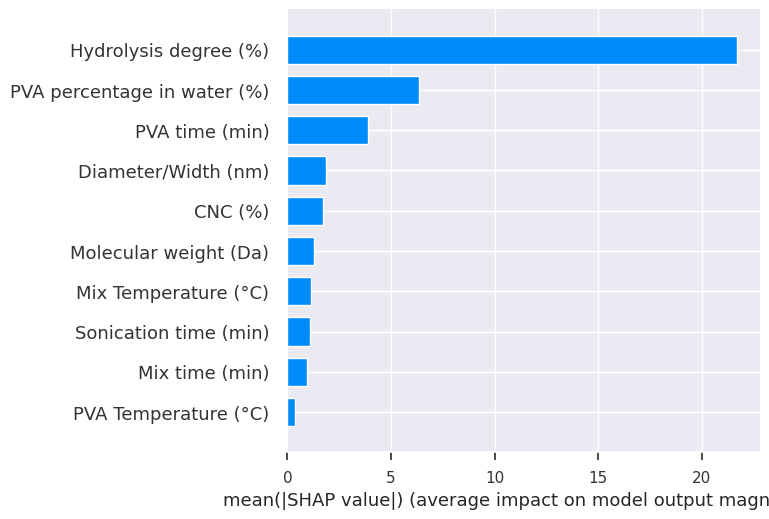

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x550 with 0 Axes>

In [ ]:
et_tune_explainer = shap.TreeExplainer(best_pipeline_et, X_train)
et_tune_shap_values = et_tune_explainer.shap_values(X_test)
shap.summary_plot(et_tune_shap_values, X_test, plot_type="bar")

In [ ]:
del X_train, X_test, y_train, y_test
gc.collect()

3654

In [ ]:
mse_train_xgb_list = []
rmse_train_xgb_list = []
mae_train_xgb_list = []
mape_train_xgb_list = []
r2_train_xgb_list = []
mse_test_xgb_list = []
rmse_test_xgb_list = []
mae_test_xgb_list = []
mape_test_xgb_list = []
r2_test_xgb_list = []
  #Implement the Extreme Gradient Boosting Regressor model
for k in range(100):
  #Split the dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
  model_xgb = XGBRegressor()
  # Train the Extreme Gradient Boosting Regressor model
  model_xgb.fit(X_train, y_train)
  # Test the Extreme Gradient Boosting Regressor model
  y_train_pred_xgb = model_xgb.predict(X_train)
  y_test_pred_xgb = model_xgb.predict(X_test)
  # Evaluate the train model
  mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
  mse_train_xgb_list.append(mse_train_xgb)
  rmse_train_xgb = np.sqrt(mse_train_xgb)
  rmse_train_xgb_list.append(rmse_train_xgb)
  mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
  mae_train_xgb_list.append(mae_train_xgb)
  mape_train_xgb = mean_absolute_percentage_error(y_train, y_train_pred_xgb)
  mape_train_xgb_list.append(mape_train_xgb)
  r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
  r2_train_xgb_list.append(r2_train_xgb)
  # Evaluate the test model
  mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
  mse_test_xgb_list.append(mse_test_xgb)
  rmse_test_xgb = np.sqrt(mse_test_xgb)
  rmse_test_xgb_list.append(rmse_test_xgb)
  mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
  mae_test_xgb_list.append(mae_test_xgb)
  mape_test_xgb = mean_absolute_percentage_error(y_test, y_test_pred_xgb)
  mape_test_xgb_list.append(mape_test_xgb)
  r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
  r2_test_xgb_list.append(r2_test_xgb)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_xgb_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_train_xgb_list)}, {np.std(mse_train_xgb_list)}')
print(f'RMSE: {rmse_train_xgb_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_train_xgb_list)}, {np.std(rmse_train_xgb_list)}')
print(f'MAE: {mae_train_xgb_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_train_xgb_list)}, {np.std(mae_train_xgb_list)}')
print(f'MAPE: {mape_train_xgb_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_train_xgb_list)}, {np.std(mape_train_xgb_list)}')
print(f'R2: {r2_train_xgb_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_train_xgb_list)}, {np.std(r2_train_xgb_list)}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_xgb_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_test_xgb_list)}, {np.std(mse_test_xgb_list)}')
print(f'RMSE: {rmse_test_xgb_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_test_xgb_list)}, {np.std(rmse_test_xgb_list)}')
print(f'MAE: {mae_test_xgb_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_test_xgb_list)}, {np.std(mae_test_xgb_list)}')
print(f'MAPE: {mape_test_xgb_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_test_xgb_list)}, {np.std(mape_test_xgb_list)}')
print(f'R2: {r2_test_xgb_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_test_xgb_list)}, {np.std(r2_test_xgb_list)}')

Train Metrics:
MSE: [1.3610078787228686e-05, 1.4502006732008605e-05, 5.863902439792194e-05, 3.6870344084156456e-05, 2.4270265163212432e-05, 4.041978114322694e-05, 1.5172350582739286e-05, 0.00011498655560276527, 6.606906240381423e-05, 3.2532271864949626e-05, 2.488920336947776e-05, 9.65956048787282e-05, 0.00011901666452485734, 0.0005581274252683568, 8.189760984379888e-05, 6.947108019151033e-05, 6.280826958865081e-05, 8.708604518470807e-05, 3.6845079411227984e-05, 1.1441136870993264e-05, 4.40614300423074e-05, 2.4527321176264357e-05, 1.5704138671557727e-05, 5.516723727322251e-05, 0.00044546159567655173, 2.256834217265724e-05, 2.161413429614621e-05, 5.752240093696479e-06, 2.5628817766756068e-05, 7.962937103490277e-05, 1.681191212151342e-05, 2.3631389373212263e-05, 1.8173714180146368e-05, 7.47516225435323e-05, 1.7180067389443602e-05, 3.9768062412181254e-05, 2.4096361631049695e-05, 1.3700200567988937e-05, 9.507704604991106e-05, 4.661754713068533e-05, 1.1444853971489688e-05, 7.106481202060243e

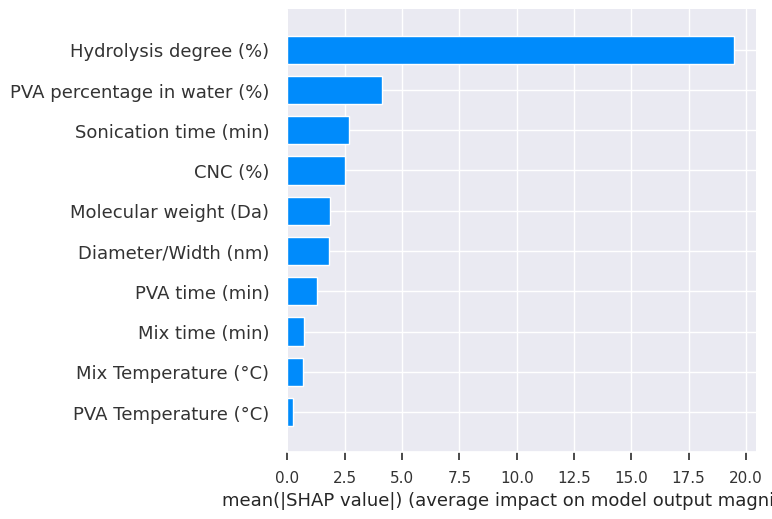

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x550 with 0 Axes>

In [ ]:
xgb_explainer = shap.Explainer(model_xgb, X_train)
xgb_shap_values = xgb_explainer.shap_values(X_test)
shap.summary_plot(xgb_shap_values, X_test, plot_type="bar")

In [ ]:
# Search space
model_xgb_tune = XGBRegressor()

param_distributionsxgb = {
    "n_estimators": list(range(10, 101)),
    "max_depth": list(range(5, 51)),
    "min_samples_split": list(range(2, 12)),
    "min_samples_leaf": list(range(1, 12)),
    "criterion": ["squared_error", "absolute_error", "poisson"],
    "max_features": list(range(1, 14))
}

random_search_xgb = RandomizedSearchCV(
    estimator=model_xgb_tune,
    param_distributions=param_distributionsxgb,
    n_iter=2000,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)


random_search_xgb.fit(X_train, y_train)


best_pipeline_xgb = random_search_xgb.best_estimator_
print(best_pipeline_xgb)

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, criterion='squared_error', device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_features=9, max_leaves=None, min_child_weight=None,
             min_samples_leaf=3, min_samples_split=10, missing=nan,
             monotone_constraints=None, multi_strategy=None, ...)


In [ ]:
del X_train, X_test, y_train, y_test
gc.collect()

81

In [ ]:
mse_train_xgb_tune_list =[]
rmse_train_xgb_tune_list = []
mae_train_xgb_tune_list = []
mape_train_xgb_tune_list = []
r2_train_xgb_tune_list = []
mse_test_xgb_tune_list = []
rmse_test_xgb_tune_list = []
mae_test_xgb_tune_list = []
mape_test_xgb_tune_list = []
r2_test_xgb_tune_list = []
for l in range(100):
  #Split the dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
  y_train_pred_xgb_tune = best_pipeline_xgb.predict(X_train)
  y_test_pred_xgb_tune = best_pipeline_xgb.predict(X_test)
  # Evaluate the train model
  mse_train_xgb_tune = mean_squared_error(y_train, y_train_pred_xgb_tune)
  rmse_train_xgb_tune = np.sqrt(mse_train_xgb_tune)
  mae_train_xgb_tune = mean_absolute_error(y_train, y_train_pred_xgb_tune)
  mape_train_xgb_tune = mean_absolute_percentage_error(y_train, y_train_pred_xgb_tune)
  r2_train_xgb_tune = r2_score(y_train, y_train_pred_xgb_tune)
  mse_train_xgb_tune_list.append(mse_train_xgb_tune)
  rmse_train_xgb_tune_list.append(rmse_train_xgb_tune)
  mae_train_xgb_tune_list.append(mae_train_xgb_tune)
  mape_train_xgb_tune_list.append(mape_train_xgb_tune)
  r2_train_xgb_tune_list.append(r2_train_xgb_tune)
  # Evaluate the test model
  mse_test_xgb_tune = mean_squared_error(y_test, y_test_pred_xgb_tune)
  mse_test_xgb_tune = mean_squared_error(y_test, y_test_pred_xgb_tune)
  rmse_test_xgb_tune = np.sqrt(mse_test_xgb_tune)
  mae_test_xgb_tune = mean_absolute_error(y_test, y_test_pred_xgb_tune)
  mape_test_xgb_tune = mean_absolute_percentage_error(y_test, y_test_pred_xgb_tune)
  r2_test_xgb_tune = r2_score(y_test, y_test_pred_xgb_tune)
  mse_test_xgb_tune_list.append(mse_test_xgb_tune)
  rmse_test_xgb_tune_list.append(rmse_test_xgb_tune)
  mae_test_xgb_tune_list.append(mae_test_xgb_tune)
  mape_test_xgb_tune_list.append(mape_test_xgb_tune)
  r2_test_xgb_tune_list.append(r2_test_xgb_tune)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_xgb_tune_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_train_xgb_tune_list)}, {np.std(mse_train_xgb_tune_list)}')
print(f'RMSE: {rmse_train_xgb_tune_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_train_xgb_tune_list)}, {np.std(rmse_train_xgb_tune_list)}')
print(f'MAE: {mae_train_xgb_tune_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_train_xgb_tune_list)}, {np.std(mae_train_xgb_tune_list)}')
print(f'MAPE: {mape_train_xgb_tune_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_train_xgb_tune_list)}, {np.std(mape_train_xgb_tune_list)}')
print(f'R2: {r2_train_xgb_tune_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_train_xgb_tune_list)}, {np.std(r2_train_xgb_tune_list)}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_xgb_tune_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_test_xgb_tune_list)}, {np.std(mse_test_xgb_tune_list)}')
print(f'RMSE: {rmse_test_xgb_tune_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_test_xgb_tune_list)}, {np.std(rmse_test_xgb_tune_list)}')
print(f'MAE: {mae_test_xgb_tune_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_test_xgb_tune_list)}, {np.std(mae_test_xgb_tune_list)}')
print(f'MAPE: {mape_test_xgb_tune_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_test_xgb_tune_list)}, {np.std(mape_test_xgb_tune_list)}')
print(f'R2: {r2_test_xgb_tune_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_test_xgb_tune_list)}, {np.std(r2_test_xgb_tune_list)}')

Train Metrics:
MSE: [32.03078116083342, 33.788031466708496, 32.790228799597706, 33.337295771039486, 33.746543710774176, 15.561264289015574, 31.249101503472417, 34.15389905895427, 31.891767153669708, 34.10985127021271, 34.467032884383705, 33.37127637926272, 32.023379539518295, 32.97914194070134, 17.431464471441174, 33.354102347007455, 34.323712151598905, 33.010252280648096, 33.772739084100536, 34.06275220917474, 33.19851601588721, 33.97239502583936, 31.21935401145896, 16.895236268467972, 33.31848334011243, 33.94047871859693, 31.405824128798063, 34.31643037094114, 33.960470478566045, 33.62452161840134, 34.19032275669709, 31.43888753259748, 17.396324840202592, 33.87226137809074, 15.086030240033836, 31.03044843149003, 33.12242027939188, 32.62883887928685, 33.788785952068736, 29.36639935586436, 32.73766786063174, 33.84560501294241, 34.02022155307751, 33.60026096272838, 31.767961353807465, 33.635271572078295, 34.22752175605685, 33.120973216958994, 33.74425126925567, 31.412938775029108, 34.50

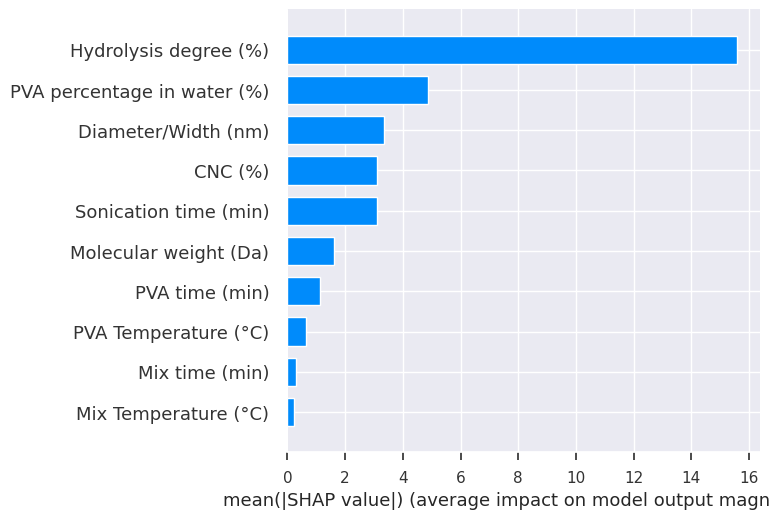

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x550 with 0 Axes>

In [ ]:
xgb_tune_explainer = shap.Explainer(best_pipeline_xgb, X_train)
xgb_tune_shap_values = xgb_tune_explainer.shap_values(X_test)
shap.summary_plot(xgb_tune_shap_values, X_test, plot_type="bar")

In [ ]:
del X_train, X_test, y_train, y_test
gc.collect()

131

In [ ]:
mse_train_gb_list = []
rmse_train_gb_list = []
mae_train_gb_list = []
mape_train_gb_list = []
r2_train_gb_list = []
mse_test_gb_list = []
rmse_test_gb_list = []
mae_test_gb_list = []
mape_test_gb_list = []
r2_test_gb_list = []

for m in range(100):
  #Split the dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
  #Implement the Gradient Boosting Regressor model
  model_gb = GradientBoostingRegressor()
  # Train the Gradient Boosting Regressor model
  model_gb.fit(X_train, y_train)
  # Test the Gradient Boosting Regressor model
  y_train_pred_gb = model_gb.predict(X_train)
  y_test_pred_gb = model_gb.predict(X_test)
  # Evaluate the train model
  mse_train_gb = mean_squared_error(y_train, y_train_pred_gb)
  rmse_train_gb = np.sqrt(mse_train_gb)
  mae_train_gb = mean_absolute_error(y_train, y_train_pred_gb)
  mape_train_gb = mean_absolute_percentage_error(y_train, y_train_pred_gb)
  r2_train_gb = r2_score(y_train, y_train_pred_gb)
  mse_train_gb_list.append(mse_train_gb)
  rmse_train_gb_list.append(rmse_train_gb)
  mae_train_gb_list.append(mae_train_gb)
  mape_train_gb_list.append(mape_train_gb)
  r2_train_gb_list.append(r2_train_gb)
  # Evaluate the test model
  mse_test_gb = mean_squared_error(y_test, y_test_pred_gb)
  rmse_test_gb = np.sqrt(mse_test_gb)
  mae_test_gb = mean_absolute_error(y_test, y_test_pred_gb)
  mape_test_gb = mean_absolute_percentage_error(y_test, y_test_pred_gb)
  r2_test_gb = r2_score(y_test, y_test_pred_gb)
  mse_test_gb_list.append(mse_test_gb)
  rmse_test_gb_list.append(rmse_test_gb)
  mae_test_gb_list.append(mae_test_gb)
  mape_test_gb_list.append(mape_test_gb)
  r2_test_gb_list.append(r2_test_gb)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_gb_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_train_gb_list)}, {np.std(mse_train_gb_list)}')
print(f'RMSE: {rmse_train_gb_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_train_gb_list)}, {np.std(rmse_train_gb_list)}')
print(f'MAE: {mae_train_gb_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_train_gb_list)}, {np.std(mae_train_gb_list)}')
print(f'MAPE: {mape_train_gb_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_train_gb_list)}, {np.std(mape_train_gb_list)}')
print(f'R2: {r2_train_gb_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_train_gb_list)}, {np.std(r2_train_gb_list)}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_gb_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_test_gb_list)}, {np.std(mse_test_gb_list)}')
print(f'RMSE: {rmse_test_gb_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_test_gb_list)}, {np.std(rmse_test_gb_list)}')
print(f'MAE: {mae_test_gb_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_test_gb_list)}, {np.std(mae_test_gb_list)}')
print(f'MAPE: {mape_test_gb_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_test_gb_list)}, {np.std(mape_test_gb_list)}')
print(f'R2: {r2_test_gb_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_test_gb_list)}, {np.std(r2_test_gb_list)}')

Train Metrics:
MSE: [13.62348621931465, 11.381923433564635, 15.213881664152026, 15.310166532652227, 11.994938637793416, 13.097718547059989, 10.946883271090611, 12.116765496036757, 13.217673251110938, 14.795698316526426, 15.541323934991263, 13.464104938820512, 14.551754083428307, 14.597001965061594, 16.39203934453688, 12.386158473093836, 14.850283314611566, 11.624381365062263, 15.18207691076862, 10.017129968246623, 11.965584030232185, 13.400198714719082, 10.60066863744006, 9.264349155274012, 12.715979525375309, 14.590390885637207, 11.538944485788706, 13.658721949338078, 15.590611975299133, 11.870451415539542, 15.751571743431967, 9.760402460278863, 10.077505739343676, 11.86656060886447, 13.613401333204449, 11.41846133451981, 12.382737518103042, 12.052780376350531, 11.96464487903109, 15.279609851482817, 12.53308760982305, 11.407674055238852, 12.760409685674853, 14.448298467465122, 10.932378043577224, 15.993337696629139, 13.308122710367705, 13.450576192967793, 15.477892912747228, 15.880959

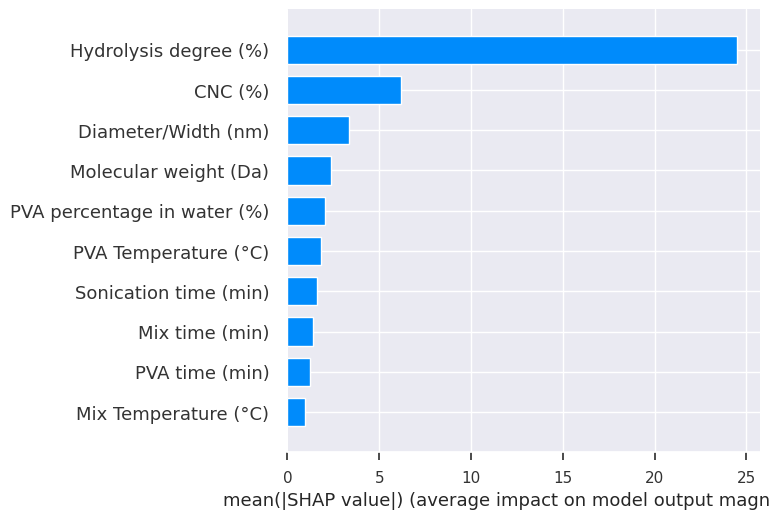

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x550 with 0 Axes>

In [ ]:
gb_explainer = shap.Explainer(model_gb, X_train)
gb_shap_values = gb_explainer.shap_values(X_test)
shap.summary_plot(gb_shap_values, X_test, plot_type="bar")

In [ ]:
# Search space
model_gb_tune = GradientBoostingRegressor()

param_distributionsgb = {
    "n_estimators": list(range(10, 101)),
    "max_depth": list(range(5, 51)),
    "min_samples_split": list(range(2, 12)),
    "min_samples_leaf": list(range(1, 12)),
    "criterion": ["squared_error", "absolute_error", "poisson"],
    "max_features": list(range(1, 14))
}

random_search_gb = RandomizedSearchCV(
    estimator=model_gb_tune,
    param_distributions=param_distributionsgb,
    n_iter=2000,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)


random_search_gb.fit(X_train, y_train)


best_pipeline_gb = random_search_gb.best_estimator_
print(best_pipeline_gb)

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
GradientBoostingRegressor(criterion='squared_error', max_depth=23,
                          max_features=6, min_samples_split=6, n_estimators=73)


In [ ]:
del X_train, X_test, y_train, y_test
gc.collect()

3584

In [ ]:
mse_train_gb_tune_list = []
rmse_train_gb_tune_list = []
mae_train_gb_tune_list = []
mape_train_gb_tune_list = []
r2_train_gb_tune_list = []
mse_test_gb_tune_list = []
rmse_test_gb_tune_list = []
mae_test_gb_tune_list = []
mape_test_gb_tune_list = []
r2_test_gb_tune_list = []
for n in range(100):
  #Split the dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
  y_train_pred_gb_tune = best_pipeline_gb.predict(X_train)
  y_test_pred_gb_tune = best_pipeline_gb.predict(X_test)
  # Evaluate the train model
  mse_train_gb_tune = mean_squared_error(y_train, y_train_pred_gb_tune)
  rmse_train_gb_tune = np.sqrt(mse_train_gb_tune)
  mae_train_gb_tune = mean_absolute_error(y_train, y_train_pred_gb_tune)
  mape_train_gb_tune = mean_absolute_percentage_error(y_train, y_train_pred_gb_tune)
  r2_train_gb_tune = r2_score(y_train, y_train_pred_gb_tune)
  mse_train_gb_tune_list.append(mse_train_gb_tune)
  rmse_train_gb_tune_list.append(rmse_train_gb_tune)
  mae_train_gb_tune_list.append(mae_train_gb_tune)
  mape_train_gb_tune_list.append(mape_train_gb_tune)
  r2_train_gb_tune_list.append(r2_train_gb_tune)
  # Evaluate the test model
  mse_test_gb_tune = mean_squared_error(y_test, y_test_pred_gb_tune)
  mse_test_gb_tune = mean_squared_error(y_test, y_test_pred_gb_tune)
  rmse_test_gb_tune = np.sqrt(mse_test_gb_tune)
  mae_test_gb_tune = mean_absolute_error(y_test, y_test_pred_gb_tune)
  mape_test_gb_tune = mean_absolute_percentage_error(y_test, y_test_pred_gb_tune)
  r2_test_gb_tune = r2_score(y_test, y_test_pred_gb_tune)
  mse_test_gb_tune_list.append(mse_test_gb_tune)
  rmse_test_gb_tune_list.append(rmse_test_gb_tune)
  mae_test_gb_tune_list.append(mae_test_gb_tune)
  mape_test_gb_tune_list.append(mape_test_gb_tune)
  r2_test_gb_tune_list.append(r2_test_gb_tune)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_gb_tune_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_train_gb_tune_list)}, {np.std(mse_train_gb_tune_list)}')
print(f'RMSE: {rmse_train_gb_tune_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_train_gb_tune_list)}, {np.std(rmse_train_gb_tune_list)}')
print(f'MAE: {mae_train_gb_tune_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_train_gb_tune_list)}, {np.std(mae_train_gb_tune_list)}')
print(f'MAPE: {mape_train_gb_tune_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_train_gb_tune_list)}, {np.std(mape_train_gb_tune_list)}')
print(f'R2: {r2_train_gb_tune_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_train_gb_tune_list)}, {np.std(r2_train_gb_tune_list)}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_gb_tune_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_test_gb_tune_list)}, {np.std(mse_test_gb_tune_list)}')
print(f'RMSE: {rmse_test_gb_tune_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_test_gb_tune_list)}, {np.std(rmse_test_gb_tune_list)}')
print(f'MAE: {mae_test_gb_tune_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_test_gb_tune_list)}, {np.std(mae_test_gb_tune_list)}')
print(f'MAPE: {mape_test_gb_tune_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_test_gb_tune_list)}, {np.std(mape_test_gb_tune_list)}')
print(f'R2: {r2_test_gb_tune_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_test_gb_tune_list)}, {np.std(r2_test_gb_tune_list)}')

Train Metrics:
MSE: [13.93605051518184, 15.64169079549241, 19.58577111673895, 19.663525009474764, 11.315889076618264, 17.02392754455087, 18.015777250909064, 17.931244297711206, 19.64313079849624, 14.865731706414108, 19.65686080226701, 15.675494987334902, 19.63803198679561, 16.486271479066698, 19.588072436235084, 14.907234434867684, 13.835977866835984, 17.8292727861493, 17.807055156134762, 16.92157041299563, 15.668539325981433, 17.99853811578911, 13.910159794424054, 19.23113031758359, 19.666145212818744, 15.316516796787617, 19.130718286916032, 19.193487630951466, 19.514927800169534, 19.629199140902852, 14.85085649074521, 13.574663677874412, 13.865002604083285, 19.642474444200502, 18.90696070410354, 19.668173993379593, 19.66432291095303, 19.642300424856103, 19.64524370694517, 12.705356393817047, 19.646822978526178, 16.611781173138848, 14.906296643848327, 17.84352230629824, 15.629101959661483, 18.001139062131127, 15.6335821198291, 19.60414119015991, 17.839863754753836, 19.656171686169934,

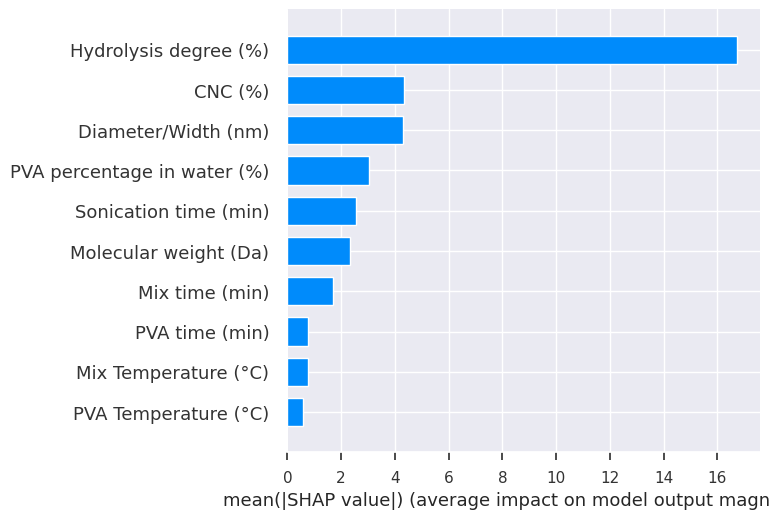

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x550 with 0 Axes>

In [ ]:
gb_tune_explainer = shap.Explainer(best_pipeline_gb, X_train)
gb_tune_shap_values = gb_tune_explainer.shap_values(X_test)
shap.summary_plot(gb_tune_shap_values, X_test, plot_type="bar")

In [ ]:
del X_train, X_test, y_train, y_test
gc.collect()

4074

In [ ]:
mse_train_rf_list = []
rmse_train_rf_list = []
mae_train_rf_list = []
mape_train_rf_list = []
r2_train_rf_list = []
mse_test_rf_list = []
rmse_test_rf_list = []
mae_test_rf_list = []
mape_test_rf_list = []
r2_test_rf_list = []

for o in range(100):
  #Split the dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
  #Implement the Random Forest model
  model_rf = RandomForestRegressor()
  # Train the Random Forest Regressor model
  model_rf.fit(X_train, y_train)
  # Test the Random Forest Regressor model
  y_train_pred_rf = model_rf.predict(X_train)
  y_test_pred_rf = model_rf.predict(X_test)
  # Evaluate the train model
  mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
  rmse_train_rf = np.sqrt(mse_train_rf)
  mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
  mape_train_rf = mean_absolute_percentage_error(y_train, y_train_pred_rf)
  r2_train_rf = r2_score(y_train, y_train_pred_rf)
  mse_train_rf_list.append(mse_train_rf)
  rmse_train_rf_list.append(rmse_train_rf)
  mae_train_rf_list.append(mae_train_rf)
  mape_train_rf_list.append(mape_train_rf)
  r2_train_rf_list.append(r2_train_rf)
  # Evaluate the test model
  mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
  rmse_test_rf = np.sqrt(mse_test_rf)
  mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
  mape_test_rf = mean_absolute_percentage_error(y_test, y_test_pred_rf)
  r2_test_rf = r2_score(y_test, y_test_pred_rf)
  mse_test_rf_list.append(mse_test_rf)
  rmse_test_rf_list.append(rmse_test_rf)
  mae_test_rf_list.append(mae_test_rf)
  mape_test_rf_list.append(mape_test_rf)
  r2_test_rf_list.append(r2_test_rf)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_rf_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_train_rf_list)}, {np.std(mse_train_rf_list)}')
print(f'RMSE: {rmse_train_rf_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_train_rf_list)}, {np.std(rmse_train_rf_list)}')
print(f'MAE: {mae_train_rf_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_train_rf_list)}, {np.std(mae_train_rf_list)}')
print(f'MAPE: {mape_train_rf_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_train_rf_list)}, {np.std(mape_train_rf_list)}')
print(f'R2: {r2_train_rf_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_train_rf_list)}, {np.std(r2_train_rf_list)}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_rf_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_test_rf_list)}, {np.std(mse_test_rf_list)}')
print(f'RMSE: {rmse_test_rf_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_test_rf_list)}, {np.std(rmse_test_rf_list)}')
print(f'MAE: {mae_test_rf_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_test_rf_list)}, {np.std(mae_test_rf_list)}')
print(f'MAPE: {mape_test_rf_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_test_rf_list)}, {np.std(mape_test_rf_list)}')
print(f'R2: {r2_test_rf_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_test_rf_list)}, {np.std(r2_test_rf_list)}')

Train Metrics:
MSE: [22.974723704381223, 25.28451569898938, 21.321392156868622, 24.03738381573223, 19.914596713763626, 25.012116197730453, 26.73719082053042, 22.38531453212352, 25.84575913692161, 18.693680544433587, 21.55379632464646, 25.59920983497039, 20.854451377792827, 24.246712584616294, 28.066741736410375, 23.34945485065379, 30.842925592150536, 22.196727056818684, 20.46076500041109, 25.646912201720983, 24.728088036411716, 22.583910817343796, 26.668736408116136, 22.237544565174193, 24.898913172122302, 17.044027530149133, 21.364923486468644, 24.32049484361346, 26.339975379649186, 25.70306620942179, 24.86781352567242, 24.378946194282946, 27.404501713508182, 20.58475789622509, 23.271068879367835, 25.395157890534737, 22.945996072496545, 24.699390849601873, 23.888002777796924, 26.523181696428907, 27.045444571436075, 24.105801524728566, 21.309132562685367, 24.68387602255088, 23.906512649831658, 31.642597893180106, 23.66639967253592, 27.15209456516291, 24.145035554106382, 24.940409374343

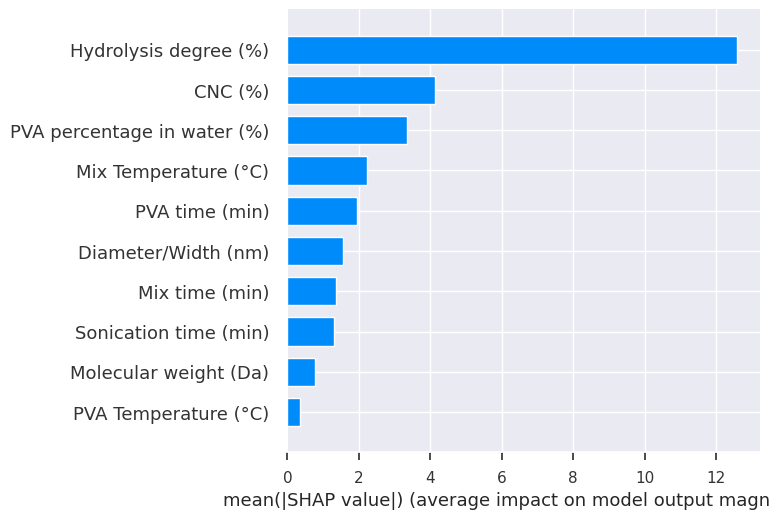

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x550 with 0 Axes>

In [ ]:
rf_explainer = shap.TreeExplainer(model_rf, X_train)
rf_shap_values = rf_explainer.shap_values(X_test)
shap.summary_plot(rf_shap_values, X_test, plot_type="bar")

In [ ]:
# Search space
model_rf_tune = RandomForestRegressor()

param_distributionsrf = {
    "n_estimators": list(range(10, 101)),
    "max_depth": list(range(5, 51)),
    "min_samples_split": list(range(2, 12)),
    "min_samples_leaf": list(range(1, 12)),
    "criterion": ["squared_error", "absolute_error", "poisson"],
    "max_features": list(range(1, 14))
}

random_search_rf = RandomizedSearchCV(
    estimator=model_rf_tune,
    param_distributions=param_distributionsrf,
    n_iter=2000,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)


random_search_rf.fit(X_train, y_train)


best_pipeline_rf = random_search_rf.best_estimator_
print(best_pipeline_rf)

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
RandomForestRegressor(criterion='absolute_error', max_depth=28, max_features=7,
                      n_estimators=55)


In [ ]:
del X_train, X_test, y_train, y_test
gc.collect()

3735

In [ ]:
mse_train_rf_tune_list = []
rmse_train_rf_tune_list = []
mae_train_rf_tune_list = []
mape_train_rf_tune_list = []
r2_train_rf_tune_list = []
mse_test_rf_tune_list = []
rmse_test_rf_tune_list = []
mae_test_rf_tune_list = []
mape_test_rf_tune_list = []
r2_test_rf_tune_list = []

for p in range(100):
  #Split the dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
  y_train_pred_rf_tune = best_pipeline_rf.predict(X_train)
  y_test_pred_rf_tune = best_pipeline_rf.predict(X_test)
  # Evaluate the train model
  mse_train_rf_tune = mean_squared_error(y_train, y_train_pred_rf_tune)
  rmse_train_rf_tune = np.sqrt(mse_train_rf_tune)
  mae_train_rf_tune = mean_absolute_error(y_train, y_train_pred_rf_tune)
  mape_train_rf_tune = mean_absolute_percentage_error(y_train, y_train_pred_rf_tune)
  r2_train_rf_tune = r2_score(y_train, y_train_pred_rf_tune)
  mse_train_rf_tune_list.append(mse_train_rf_tune)
  rmse_train_rf_tune_list.append(rmse_train_rf_tune)
  mae_train_rf_tune_list.append(mae_train_rf_tune)
  mape_train_rf_tune_list.append(mape_train_rf_tune)
  r2_train_rf_tune_list.append(r2_train_rf_tune)
  # Evaluate the test model
  mse_test_rf_tune = mean_squared_error(y_test, y_test_pred_rf_tune)
  mse_test_rf_tune = mean_squared_error(y_test, y_test_pred_rf_tune)
  rmse_test_rf_tune = np.sqrt(mse_test_rf_tune)
  mae_test_rf_tune = mean_absolute_error(y_test, y_test_pred_rf_tune)
  mape_test_rf_tune = mean_absolute_percentage_error(y_test, y_test_pred_rf_tune)
  r2_test_rf_tune = r2_score(y_test, y_test_pred_rf_tune)
  mse_test_rf_tune_list.append(mse_test_rf_tune)
  rmse_test_rf_tune_list.append(rmse_test_rf_tune)
  mae_test_rf_tune_list.append(mae_test_rf_tune)
  mape_test_rf_tune_list.append(mape_test_rf_tune)
  r2_test_rf_tune_list.append(r2_test_rf_tune)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_rf_tune_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_train_rf_tune_list)}, {np.std(mse_train_rf_tune_list)}')
print(f'RMSE: {rmse_train_rf_tune_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_train_rf_tune_list)}, {np.std(rmse_train_rf_tune_list)}')
print(f'MAE: {mae_train_rf_tune_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_train_rf_tune_list)}, {np.std(mae_train_rf_tune_list)}')
print(f'MAPE: {mape_train_rf_tune_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_train_rf_tune_list)}, {np.std(mape_train_rf_tune_list)}')
print(f'R2: {r2_train_rf_tune_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_train_rf_tune_list)}, {np.std(r2_train_rf_tune_list)}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_rf_tune_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_test_rf_tune_list)}, {np.std(mse_test_rf_tune_list)}')
print(f'RMSE: {rmse_test_rf_tune_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_test_rf_tune_list)}, {np.std(rmse_test_rf_tune_list)}')
print(f'MAE: {mae_test_rf_tune_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_test_rf_tune_list)}, {np.std(mae_test_rf_tune_list)}')
print(f'MAPE: {mape_test_rf_tune_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_test_rf_tune_list)}, {np.std(mape_test_rf_tune_list)}')
print(f'R2: {r2_test_rf_tune_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_test_rf_tune_list)}, {np.std(r2_test_rf_tune_list)}')

Train Metrics:
MSE: [43.57371589342127, 41.40245323214662, 44.99024625871578, 47.000243194223806, 45.68916152356476, 44.379504806742375, 46.68155732125945, 40.71312298708175, 47.00589758362391, 36.534819235048886, 45.76677971655167, 42.312395481815834, 46.63549777432186, 46.50277458951431, 44.878862800539416, 43.86344726209526, 47.36264085582891, 32.93071676642938, 45.226092984756434, 45.677759631931934, 45.46228130063489, 46.08518875621859, 41.64488865092569, 36.08696764525286, 39.08822895540093, 44.328198549983114, 46.25640157323799, 45.952502608700634, 37.73240692749594, 41.81121874873435, 45.02399877956994, 45.04612605088542, 44.54526140968712, 45.690439857775914, 47.409463504617605, 47.08589163115821, 43.91313627922505, 47.50215952881399, 41.85860384064264, 45.89319309018913, 46.1122387977151, 44.86147196281568, 45.346686332764556, 41.34807920628839, 43.55000225713167, 45.80628292041814, 41.14720186945644, 44.86123273821001, 43.851104838571494, 41.82771876498119, 46.00223338380142

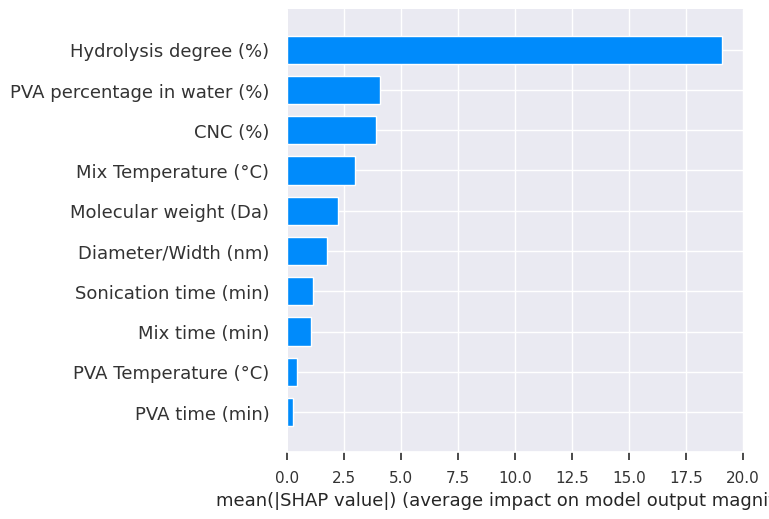

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x550 with 0 Axes>

In [ ]:
rf_tune_explainer = shap.TreeExplainer(best_pipeline_rf, X_train)
rf_tune_shap_values = rf_tune_explainer.shap_values(X_test)
shap.summary_plot(rf_tune_shap_values, X_test, plot_type="bar")

In [ ]:
del X_train, X_test, y_train, y_test
gc.collect()

3878

In [ ]:
mse_train_ada_list = []
rmse_train_ada_list = []
mae_train_ada_list = []
mape_train_ada_list = []
r2_train_ada_list = []
mse_test_ada_list = []
rmse_test_ada_list = []
mae_test_ada_list = []
mape_test_ada_list = []
r2_test_ada_list = []

for q in range(100):
  #Split the dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
  #Implement the Ada Boost Regressor model
  model_ada = AdaBoostRegressor()
  # Train the AdaBoostRegressor model
  model_ada.fit(X_train, y_train)
  # Test the AdaBoostRegressor model
  y_train_pred_ada = model_ada.predict(X_train)
  y_test_pred_ada = model_ada.predict(X_test)
  # Evaluate the train model
  mse_train_ada = mean_squared_error(y_train, y_train_pred_ada)
  rmse_train_ada = np.sqrt(mse_train_ada)
  mae_train_ada = mean_absolute_error(y_train, y_train_pred_ada)
  mape_train_ada = mean_absolute_percentage_error(y_train, y_train_pred_ada)
  r2_train_ada = r2_score(y_train, y_train_pred_ada)
  mse_train_ada_list.append(mse_train_ada)
  rmse_train_ada_list.append(rmse_train_ada)
  mae_train_ada_list.append(mae_train_ada)
  mape_train_ada_list.append(mape_train_ada)
  r2_train_ada_list.append(r2_train_ada)
  # Evaluate the test model
  mse_test_ada = mean_squared_error(y_test, y_test_pred_ada)
  rmse_test_ada = np.sqrt(mse_test_ada)
  mae_test_ada = mean_absolute_error(y_test, y_test_pred_ada)
  mape_test_ada = mean_absolute_percentage_error(y_test, y_test_pred_ada)
  r2_test_ada = r2_score(y_test, y_test_pred_ada)
  mse_test_ada_list.append(mse_test_ada)
  rmse_test_ada_list.append(rmse_test_ada)
  mae_test_ada_list.append(mae_test_ada)
  mape_test_ada_list.append(mape_test_ada)
  r2_test_ada_list.append(r2_test_ada)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_ada_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_train_ada_list)}, {np.std(mse_train_ada_list)}')
print(f'RMSE: {rmse_train_ada_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_train_ada_list)}, {np.std(rmse_train_ada_list)}')
print(f'MAE: {mae_train_ada_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_train_ada_list)}, {np.std(mae_train_ada_list)}')
print(f'MAPE: {mape_train_ada_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_train_ada_list)}, {np.std(mape_train_ada_list)}')
print(f'R2: {r2_train_ada_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_train_ada_list)}, {np.std(r2_train_ada_list)}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_ada_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_test_ada_list)}, {np.std(mse_test_ada_list)}')
print(f'RMSE: {rmse_test_ada_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_test_ada_list)}, {np.std(rmse_test_ada_list)}')
print(f'MAE: {mae_test_ada_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_test_ada_list)}, {np.std(mae_test_ada_list)}')
print(f'MAPE: {mape_test_ada_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_test_ada_list)}, {np.std(mape_test_ada_list)}')
print(f'R2: {r2_test_ada_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_test_ada_list)}, {np.std(r2_test_ada_list)}')

Train Metrics:
MSE: [93.75629672632913, 79.2457865836623, 88.6580638145842, 84.32689122528215, 85.30022160728639, 70.42361213861282, 81.44317435797105, 88.1659720881325, 86.45395117190463, 82.35614229821016, 95.27668428452434, 88.47529899358635, 74.53798855524884, 85.51251960379858, 83.63313623029575, 92.2765842958212, 85.8314490475298, 87.38182644089113, 99.07086180444286, 94.75884571233941, 87.71461871043736, 79.68980281269796, 84.737818585687, 86.6422476662791, 75.5533530270063, 85.12690089512431, 82.08539128696977, 86.63536183488492, 73.96722579646902, 73.20285936862426, 88.16005219215447, 104.66238459938813, 103.11901446294928, 87.87153260079693, 95.31307093812838, 85.6231931960376, 76.8974309891848, 92.59434684502264, 89.32778064088221, 90.11490513907097, 79.60856143951753, 88.73755223499006, 86.96572992327206, 97.31277149698583, 84.24251621063532, 78.74169865964733, 95.68970709168521, 90.17433551590086, 83.79474447892369, 86.07411630022364, 89.87837625195228, 85.33870773308, 83.

ExactExplainer explainer: 12it [00:10,  3.57s/it]


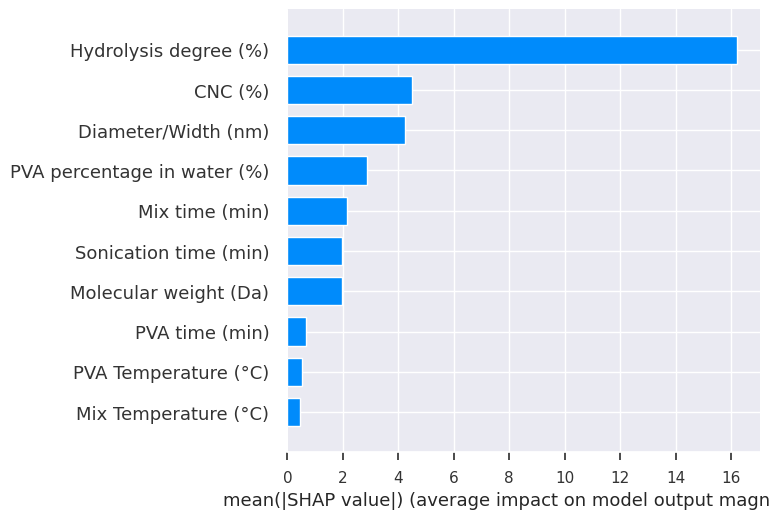

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x550 with 0 Axes>

In [ ]:
ada_explainer = shap.Explainer(model_ada.predict, X_train)
ada_shap_values = ada_explainer(X_test)
shap.summary_plot(ada_shap_values, X_test, plot_type="bar")

In [ ]:
# Search space
model_ada_tune = AdaBoostRegressor()

param_distributionsada = {
    "n_estimators": list(range(10, 101))
}

random_search_ada = RandomizedSearchCV(
    estimator=model_ada_tune,
    param_distributions=param_distributionsada,
    n_iter=2000,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)


random_search_ada.fit(X_train, y_train)


best_pipeline_ada = random_search_ada.best_estimator_
print(best_pipeline_ada)

Fitting 3 folds for each of 91 candidates, totalling 273 fits
AdaBoostRegressor(n_estimators=15)


In [ ]:
del X_train, X_test, y_train, y_test
gc.collect()

52771

In [ ]:
mse_train_ada_tune_list = []
rmse_train_ada_tune_list = []
mae_train_ada_tune_list = []
mape_train_ada_tune_list = []
r2_train_ada_tune_list = []
mse_test_ada_tune_list = []
rmse_test_ada_tune_list = []
mae_test_ada_tune_list = []
mape_test_ada_tune_list = []
r2_test_ada_tune_list = []

for r in range(100):
  #Split the dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
  y_train_pred_ada_tune = best_pipeline_ada.predict(X_train)
  y_test_pred_ada_tune = best_pipeline_ada.predict(X_test)
  # Evaluate the train model
  mse_train_ada_tune = mean_squared_error(y_train, y_train_pred_ada_tune)
  rmse_train_ada_tune = np.sqrt(mse_train_ada_tune)
  mae_train_ada_tune = mean_absolute_error(y_train, y_train_pred_ada_tune)
  mape_train_ada_tune = mean_absolute_percentage_error(y_train, y_train_pred_ada_tune)
  r2_train_ada_tune = r2_score(y_train, y_train_pred_ada_tune)
  mse_train_ada_tune_list.append(mse_train_ada_tune)
  rmse_train_ada_tune_list.append(rmse_train_ada_tune)
  mae_train_ada_tune_list.append(mae_train_ada_tune)
  mape_train_ada_tune_list.append(mape_train_ada_tune)
  r2_train_ada_tune_list.append(r2_train_ada_tune)
  # Evaluate the test model
  mse_test_ada_tune = mean_squared_error(y_test, y_test_pred_ada_tune)
  mse_test_ada_tune = mean_squared_error(y_test, y_test_pred_ada_tune)
  rmse_test_ada_tune = np.sqrt(mse_test_ada_tune)
  mae_test_ada_tune = mean_absolute_error(y_test, y_test_pred_ada_tune)
  mape_test_ada_tune = mean_absolute_percentage_error(y_test, y_test_pred_ada_tune)
  r2_test_ada_tune = r2_score(y_test, y_test_pred_ada_tune)
  mse_test_ada_tune_list.append(mse_test_ada_tune)
  rmse_test_ada_tune_list.append(rmse_test_ada_tune)
  mae_test_ada_tune_list.append(mae_test_ada_tune)
  mape_test_ada_tune_list.append(mape_test_ada_tune)
  r2_test_ada_tune_list.append(r2_test_ada_tune)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_ada_tune_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_train_ada_tune_list)}, {np.std(mse_train_ada_tune_list)}')
print(f'RMSE: {rmse_train_ada_tune_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_train_ada_tune_list)}, {np.std(rmse_train_ada_tune_list)}')
print(f'MAE: {mae_train_ada_tune_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_train_ada_tune_list)}, {np.std(mae_train_ada_tune_list)}')
print(f'MAPE: {mape_train_ada_tune_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_train_ada_tune_list)}, {np.std(mape_train_ada_tune_list)}')
print(f'R2: {r2_train_ada_tune_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_train_ada_tune_list)}, {np.std(r2_train_ada_tune_list)}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_ada_tune_list}')
print(f'MSE mean and standard deviation: {np.mean(mse_test_ada_tune_list)}, {np.std(mse_test_ada_tune_list)}')
print(f'RMSE: {rmse_test_ada_tune_list}')
print(f'RMSE mean and standard deviation: {np.mean(rmse_test_ada_tune_list)}, {np.std(rmse_test_ada_tune_list)}')
print(f'MAE: {mae_test_ada_tune_list}')
print(f'MAE mean and standard deviation: {np.mean(mae_test_ada_tune_list)}, {np.std(mae_test_ada_tune_list)}')
print(f'MAPE: {mape_test_ada_tune_list}')
print(f'MAPE mean and standard deviation: {np.mean(mape_test_ada_tune_list)}, {np.std(mape_test_ada_tune_list)}')
print(f'R2: {r2_test_ada_tune_list}')
print(f'R2 mean and standard deviation: {np.mean(r2_test_ada_tune_list)}, {np.std(r2_test_ada_tune_list)}')

Train Metrics:
MSE: [118.91067185316909, 117.5521046470272, 118.72486920372118, 115.15955316353462, 117.52412176051054, 124.1943068754709, 127.98178583275802, 110.58628208424597, 123.49193079384258, 107.67712961937228, 118.46600487630717, 122.76239823483729, 124.23662217979563, 116.98790736425303, 117.36284331786383, 127.07745894633547, 114.52163957617137, 104.2857271047681, 127.94178028815588, 113.61867915320192, 119.33210206576173, 126.5923228408097, 118.67506074609234, 120.55388073874848, 106.49003784373679, 112.16203077421535, 121.54059359147875, 115.58633221768308, 112.63789189381725, 115.01441744102992, 119.90736814150021, 119.3584734842699, 115.51503338664811, 105.51535499815732, 120.26227102082059, 118.42408964078318, 129.83279791863205, 117.72810449664549, 120.4009903394785, 120.90069263019272, 124.18070331031161, 113.52032615543357, 122.16598545001803, 115.60507892694186, 115.96258193283212, 126.70329345500352, 115.93151323780769, 123.38862746722054, 106.77460201319515, 120.1

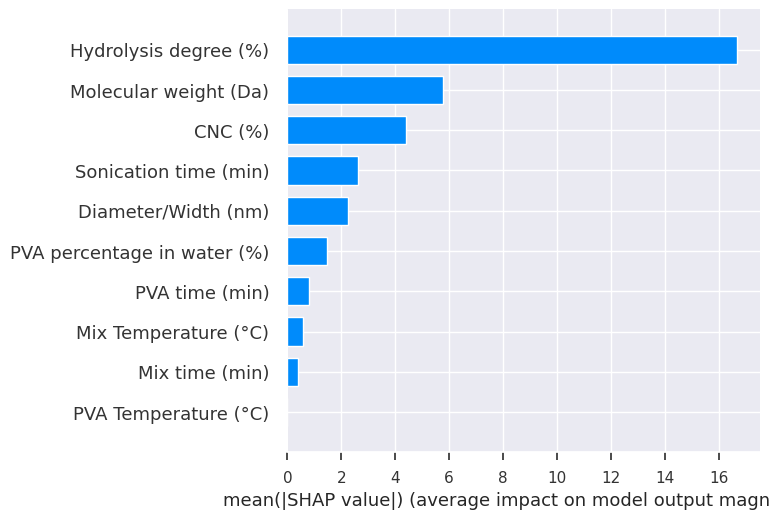

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x550 with 0 Axes>

In [ ]:
ada_tune_explainer = shap.Explainer(best_pipeline_ada.predict, X_train)
ada_tune_shap_values = ada_tune_explainer(X_test)
shap.summary_plot(ada_tune_shap_values, X_test, plot_type="bar")

In [ ]:
del X_train, X_test, y_train, y_test
gc.collect()

131